# Keras and convolutional nets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
import tensorflow as tf

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\ten

In [3]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Convolutions

In [13]:
batch_size =128
num_classes = 10
epochs =12


#input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train_images  = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test_images = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = to_categorical(y_train, num_classes)
y_test =to_categorical(y_test, num_classes)

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [15]:
num_classes =10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),
              activation ='relu',
              input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [17]:
cnn.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(X_train_images, y_train,
                     batch_size=128, epochs=20, verbose=1,
                     validation_split=.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 43s 802us/sample - loss: 8.7599 - accuracy: 0.4288 - val_loss: 0.1217 - val_accuracy: 0.9640
Epoch 2/20
54000/54000 [==============================] - 45s 835us/sample - loss: 0.0966 - accuracy: 0.9711 - val_loss: 0.0698 - val_accuracy: 0.9793
Epoch 3/20
54000/54000 [==============================] - 48s 897us/sample - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0575 - val_accuracy: 0.9843
Epoch 4/20
54000/54000 [==============================] - 62s 1ms/sample - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0617 - val_accuracy: 0.9835
Epoch 5/20
54000/54000 [==============================] - 59s 1ms/sample - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0623 - val_accuracy: 0.9830
Epoch 6/20
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.0235 - accuracy: 0.9918

# Visualizing

In [18]:
cnn.evaluate(X_test_images, y_test)

10000/10000 [==============================] - 4s 415us/sample - loss: 0.0784 - accuracy: 0.9867


[0.07839020450537532, 0.9867]

(0.9, 1.0)

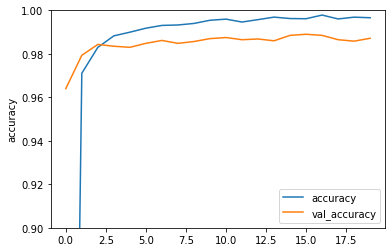

In [20]:
df = pd.DataFrame(history_cnn.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel('accuracy')
plt.ylim(.9, 1)